In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import ttest_ind

In [3]:
df = pd.read_csv('marketing_AB.csv')
df.head(5)

,Unnamed: 0,user id,test group,converted,total ads,most ads day,most ads hour
0,0,1069124,ad,False,130,Monday,20
1,1,1119715,ad,False,93,Tuesday,22
2,2,1144181,ad,False,21,Tuesday,18
3,3,1435133,ad,False,355,Tuesday,10
4,4,1015700,ad,False,276,Friday,14


In [4]:
# Learn more about the columns
df.info()

# Check for missing values
df.isnull().sum()

# Convert 'converted' into an integer
df['converted'] = df['converted'].astype(int)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 588101 entries, 0 to 588100
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Unnamed: 0     588101 non-null  int64 
 1   user id        588101 non-null  int64 
 2   test group     588101 non-null  object
 3   converted      588101 non-null  bool  
 4   total ads      588101 non-null  int64 
 5   most ads day   588101 non-null  object
 6   most ads hour  588101 non-null  int64 
dtypes: bool(1), int64(4), object(2)
memory usage: 27.5+ MB


In [5]:
# Summary Statistics
print('Summary Statistics')
print(df.describe())

Summary Statistics
          Unnamed: 0       user id      converted      total ads  \
count  588101.000000  5.881010e+05  588101.000000  588101.000000   
mean   294050.000000  1.310692e+06       0.025239      24.820876   
std    169770.279668  2.022260e+05       0.156850      43.715181   
min         0.000000  9.000000e+05       0.000000       1.000000   
25%    147025.000000  1.143190e+06       0.000000       4.000000   
50%    294050.000000  1.313725e+06       0.000000      13.000000   
75%    441075.000000  1.484088e+06       0.000000      27.000000   
max    588100.000000  1.654483e+06       1.000000    2065.000000   

       most ads hour  
count  588101.000000  
mean       14.469061  
std         4.834634  
min         0.000000  
25%        11.000000  
50%        14.000000  
75%        18.000000  
max        23.000000  


In [6]:
# Determine how many people are in each test group
df['test group'].value_counts()

test group
ad     564577
psa     23524
Name: count, dtype: int64

In [7]:
# Calculate the overall conversion rate
df['converted'].mean()

np.float64(0.02523886203220195)

In [8]:
# Compare the conversion rates between different test groups
df.groupby('test group')['converted'].mean()

test group
ad     0.025547
psa    0.017854
Name: converted, dtype: float64

In [9]:
# Split data into two groups based on the two test_group variables
ad = df[df['test group'] == 'ad']['converted']
psa = df[df['test group'] == 'psa']['converted']

# Perform independent t-tests with unequal variance
t_stat, p_value = ttest_ind(ad, psa, equal_var=False)

print('T-test Results:')
print(f'T-statistics: {t_stat}')
print(f"p-value: {p_value}")

T-test Results:
T-statistics: 8.657162314551679
p-value: 5.107607598758945e-18


C:\Users\hanag_wdy1xo1\AppData\Local\Temp\ipykernel_22328\2991208401.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conversion_rate_by_group.index, y=conversion_rate_by_group.values, palette='colorblind', legend=False)


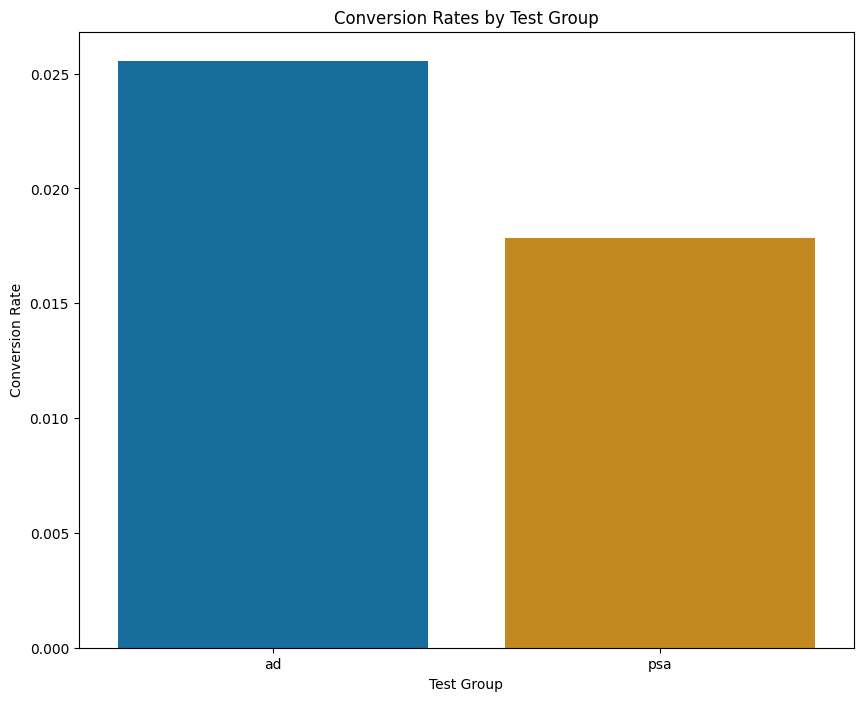

In [10]:
# Create a bar graph of the conversion rates
conversion_rate_by_group = df.groupby('test group')['converted'].mean()

plt.figure(figsize=(10,8))
sns.barplot(x=conversion_rate_by_group.index, y=conversion_rate_by_group.values, palette='colorblind', legend=False)
plt.title('Conversion Rates by Test Group')
plt.xlabel('Test Group')
plt.ylabel('Conversion Rate')
plt.show()

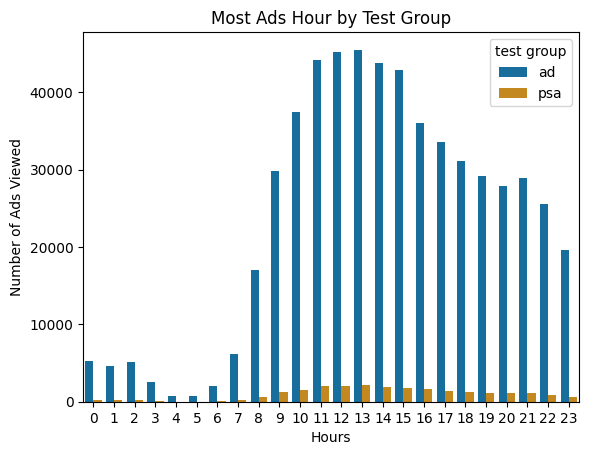

In [ ]:
# Plotting a Bar Graph of the Most Ads Seen Per Hour by each Test Group
sns.countplot(data=df, x='most ads hour', hue='test group', palette='colorblind')
plt.title("Most Ads Hour by Test Group")
plt.ylabel("Number of Ads Viewed")
plt.xlabel("Hours")
plt.show()

test group        ad       psa
total ads                     
1           0.001584  0.001300
2           0.002400  0.001566
3           0.002818  0.003001
4           0.003616  0.002927
5           0.003283  0.007037
None


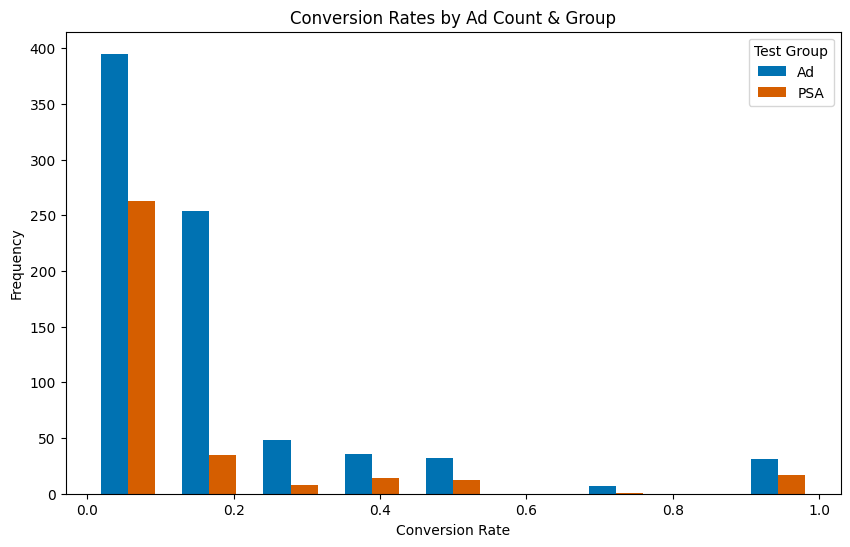

In [28]:
# Conversion Rates by Total Ads & Test Group
conversion_rate_by_total_ads = df.groupby(['total ads', 'test group'])['converted'].mean().unstack()
print(print(conversion_rate_by_total_ads.head()))

# Prepare data
ad_rates = conversion_rate_by_total_ads['ad']
psa_rates = conversion_rate_by_total_ads['psa']

bins = np.linspace(0, max(ad_rates.max(), psa_rates.max()), 10)  # same bins for both
width = (bins[1] - bins[0]) / 3  # width of each bar, slightly smaller than bin size
bin_centers = (bins[:-1] + bins[1:]) / 2

# Count frequencies manually
ad_counts, _ = np.histogram(ad_rates, bins)
psa_counts, _ = np.histogram(psa_rates, bins)

# Colorblind-friendly colors: blue and orange
colors = ['#0072B2', '#D55E00']

# Plot side-by-side bars
plt.figure(figsize=(10,6))
plt.bar(bin_centers - width/2, ad_counts, width=width, label='Ad', color=colors[0])
plt.bar(bin_centers + width/2, psa_counts, width=width, label='PSA', color=colors[1])

plt.xlabel('Conversion Rate')
plt.ylabel('Frequency')
plt.title('Conversion Rates by Ad Count & Group')
plt.legend(title='Test Group')
plt.show()

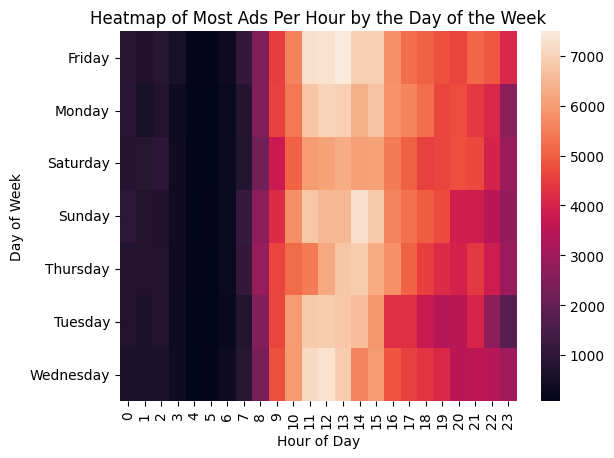

In [32]:
# Heatmap of most ads per hour by the most ads per day
heatmap_data = df.groupby(['most ads day', 'most ads hour']).size().unstack()
sns.heatmap(heatmap_data, cmap='rocket')
plt.title("Heatmap of Most Ads Per Hour by the Day of the Week")
plt.xlabel("Hour of Day")
plt.ylabel("Day of Week")
plt.show()